<a href="https://colab.research.google.com/github/Idowuilekura/xai/blob/main/idowu_ilekura_XAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explainable AI Assignment
This is a template for Assignment 2 of Machine Learning Bootcamp. Please make sure you perform all tasks within the sections created. This ensures that your assignment is evaluated correctly. 

If you want to do something extra and show us your creativity, we have also created a space for it at the end!

**About the challenge** 

Heart disease describes a range of conditions that affect your heart. With growing stress, the number of cases of heart diseases are increasing rapidly.

According to the World Health Organisation(WHO), Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year. 17.9 million people die each year from CVDs, an estimated 31% of all deaths worldwide.

**Problem Statement**
The doctors of Health Hospital in Zastra wish to incorporate Data Science into their workings. Seeing the rising cases of heart diseases, they are specially interested in predicting the presence of heart disease in a person using some existing data. The first step they are taking towards it is to conduct a Datathon to find the best Machine Learning Engineers available out there. 

**Objective**
The idea behind this ML project is to build an ML model to determine if heart disease is present or not i.e if the target is 1 or 0. 

**Evaluation Criteria**
Submissions are evaluated using F1 Score

This is my assignment on explainable AI as part of [Dphi's](https://dphi.tech/lms/learn/ml-bootcamp-advanced/) Advanced machine learning bootcamp


# Task 1

## Import Libraries

In [ ]:
import pandas as pd # for loading data and analysis
import numpy as np # for numerical operation
import matplotlib.pyplot as plt #for visualixation
import sklearn # for machine learning
from sklearn.linear_model import LogisticRegression 
import seaborn as sns #for viszualization
%matplotlib inline 
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import plotly as py
pd.set_option('display.max_rows',500)
! pip install shap 
! pip install chart_studio
import shap #used for explaining models
shap.initjs()
from plotly.offline import iplot,init_notebook_mode
import plotly.tools as tls
import cufflinks as cf
cf.go_offline 
import chart_studio as cs
cs.tools.set_credentials_file(username='*********',api_key="************")
import plotly.express as px

## Load the data
Display the first 5 rows of the data after loading.

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Heart_Disease/Training_set_heart.csv")

## Perform Basic Exploratory Data Analysis

In [ ]:
data.head()

age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   48    1   2       124   255    1  ...      0      0.0      2   2     2       1
1   68    0   2       120   211    0  ...      0      1.5      1   0     2       1
2   46    1   0       120   249    0  ...      0      0.8      2   0     3       0
3   60    1   0       130   253    0  ...      1      1.4      2   1     3       0
4   43    1   0       115   303    0  ...      0      1.2      1   0     2       1

[5 rows x 14 columns]

In [ ]:
print(f'the data has {data.shape[0]} rows and {data.shape[1]} columns')
print(f'the data has {data.isnull().any().sum()} null value(s)')

the data has 212 rows as 14 columns
the data has 0 null value(s)


In [ ]:
#show a summary statistics on the data
data.describe(include='all')

age         sex          cp  ...          ca        thal      target
count  212.000000  212.000000  212.000000  ...  212.000000  212.000000  212.000000
mean    54.561321    0.688679    0.915094  ...    0.783019    2.320755    0.542453
std      9.493376    0.464130    1.008193  ...    1.066551    0.646495    0.499374
min     29.000000    0.000000    0.000000  ...    0.000000    0.000000    0.000000
25%     47.000000    0.000000    0.000000  ...    0.000000    2.000000    0.000000
50%     57.000000    1.000000    1.000000  ...    0.000000    2.000000    1.000000
75%     61.250000    1.000000    2.000000  ...    1.000000    3.000000    1.000000
max     77.000000    1.000000    3.000000  ...    4.000000    3.000000    1.000000

[8 rows x 14 columns]

In [ ]:
#getting info about the data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       212 non-null    int64  
 1   sex       212 non-null    int64  
 2   cp        212 non-null    int64  
 3   trestbps  212 non-null    int64  
 4   chol      212 non-null    int64  
 5   fbs       212 non-null    int64  
 6   restecg   212 non-null    int64  
 7   thalach   212 non-null    int64  
 8   exang     212 non-null    int64  
 9   oldpeak   212 non-null    float64
 10  slope     212 non-null    int64  
 11  ca        212 non-null    int64  
 12  thal      212 non-null    int64  
 13  target    212 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 23.3 KB


All the columns are numerical hence no need to convert to numeric figures

In [ ]:
"""this plot will show the distribution of values 
in the data columns to the target"""
data.iplot(kind='bar',x='target')

In [ ]:
data.target.value_counts()

1    115
0     97
Name: target, dtype: int64

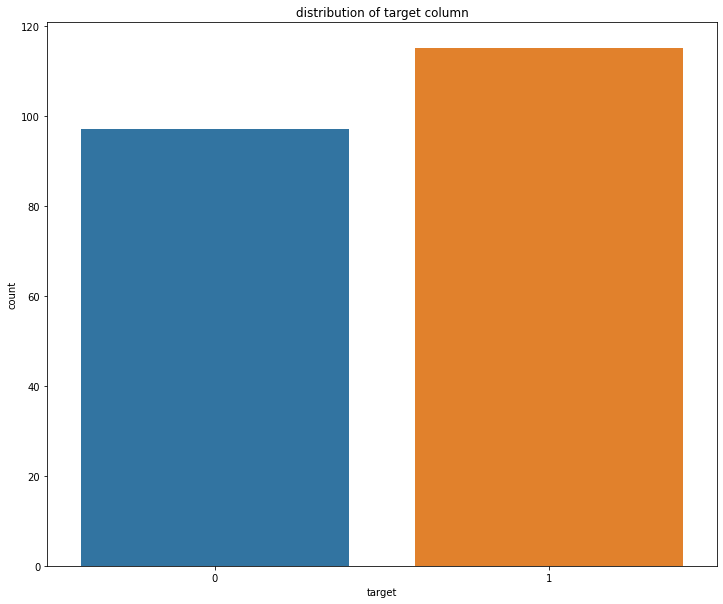

In [ ]:
fig = plt.figure(figsize=(12,10))
ax = plt.subplot()
ax =sns.countplot(data['target'])
ax.set_title('distribution of target column')
ax.spines['right'].set_visible('off')
plt.show()

From the above plot it can be shown that the classes are somehow balanced 

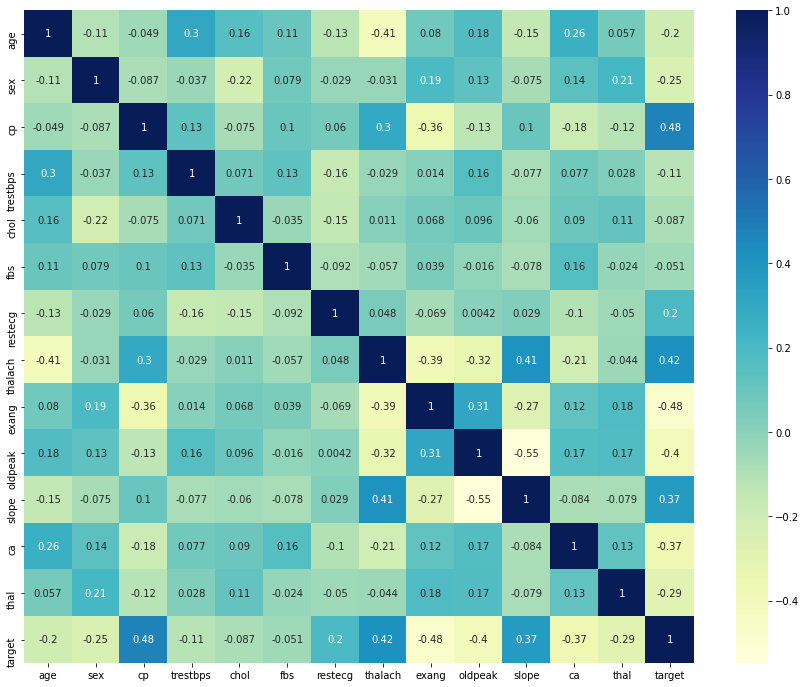

In [ ]:
# correlation of the columns with the target variable
fig = plt.figure(figsize=(15,12))
ax = plt.subplot()
correlation = data.corr()
sns.heatmap(correlation,annot=True,cmap="YlGnBu",ax=ax)

From the above plot, it can be seen that slope,cp,thalach,ca,exang have strong correlation with the target column while fbs,chol,trestbs have week correlation

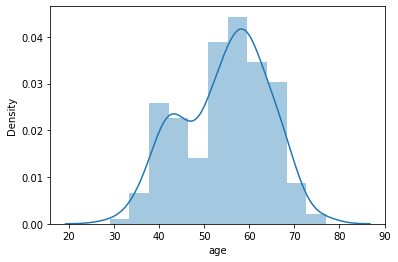

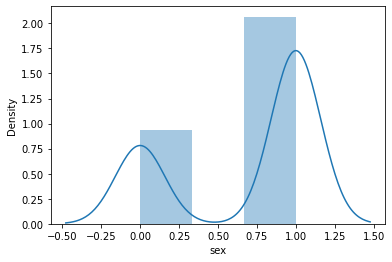

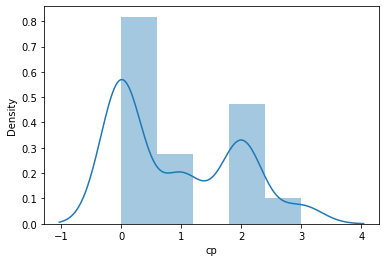

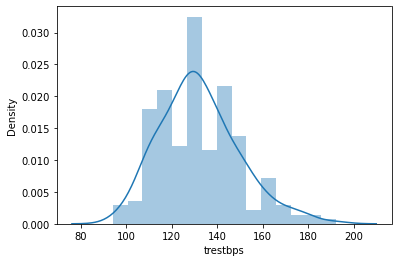

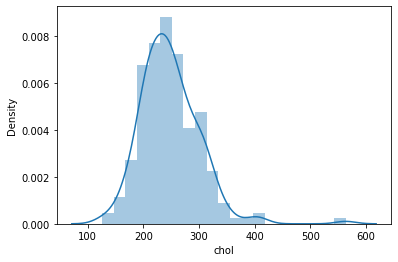

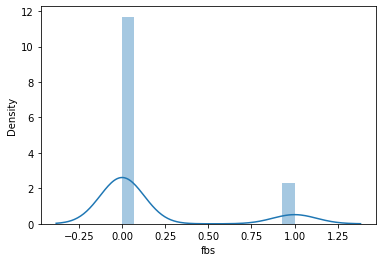

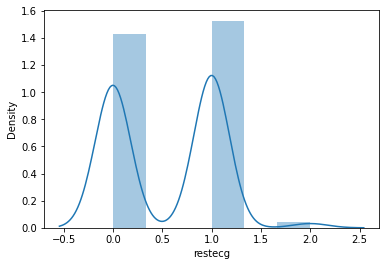

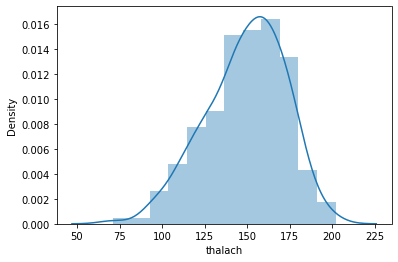

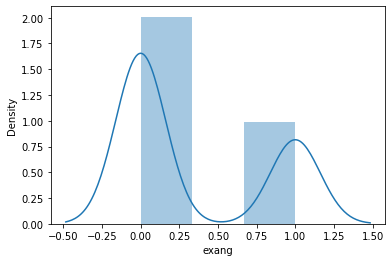

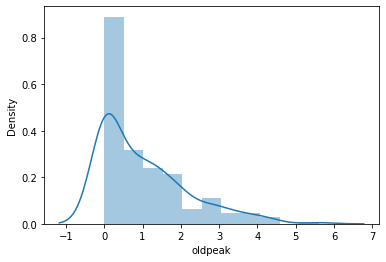

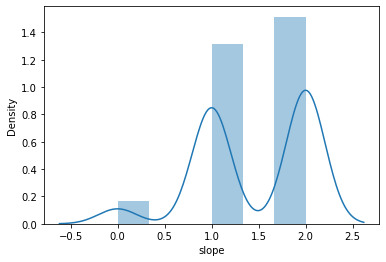

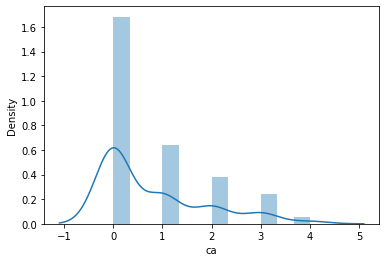

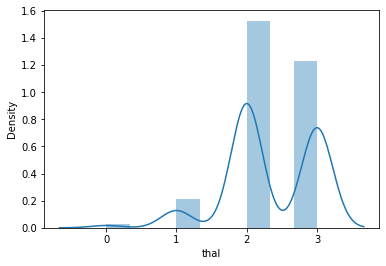

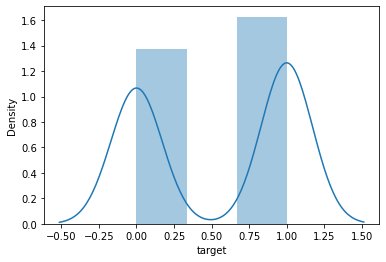

In [ ]:
#checking the distribution of values in all columns( since it is all numerical)
for index, column in enumerate(data.columns):
  sns.distplot(data[column])
  plt.show()

From the above it seems the distributions in the columns follow a normal distribution

## Separate the Input and Target Features of the data

In [ ]:
# separaing the 
df = data.copy()
#df_feat is the dataframe containing the features
df_feat = df.drop('target',axis=1)
label = df['target']

## Split the data into Train and Test Sets
The train to test ratio should be 80:20 and the random_state should be 0.


In [ ]:
X_train,X_test,y_train,y_test= train_test_split(df_feat,label,test_size=0.2,random_state=0,stratify=label)

In [ ]:
X_train_real,X_test_real,y_train_real,y_test_real= X_train,X_test,y_train,y_test

## Scale your data if required

In [ ]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
""" since the data columns are numerical, we will scale all the columns
and convert back to dataframe"""
X_train = pd.DataFrame(standard_scaler.fit_transform(X_train[X_train.columns]),columns=X_train.columns)
X_test = pd.DataFrame(standard_scaler.fit_transform(X_test[X_test.columns]),columns=X_test.columns)

In [ ]:
X_train.head()

age       sex        cp  ...     slope        ca      thal
0 -0.476328  0.685248 -0.885244  ... -0.797451 -0.721056  1.070529
1 -0.997023  0.685248 -0.885244  ...  0.908489 -0.721056 -0.516483
2 -1.205301 -1.459325 -0.885244  ... -0.797451 -0.721056  1.070529
3 -1.621857  0.685248  1.122893  ...  0.908489 -0.721056 -0.516483
4  1.710590 -1.459325  1.122893  ...  0.908489  0.238459 -0.516483

[5 rows x 13 columns]

# Task 2

## Build a Logistic Regression Model on train set

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='saga',n_jobs=-1,verbose=1,max_iter=200,random_state=0)
log_reg.fit(X_train,y_train)

max_iter reached after 0 seconds


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=0,
                   solver='saga', tol=0.0001, verbose=1, warm_start=False)

## Evaluate the model using F1 Score

In [ ]:
#evaluating the prediction using f1_score
from sklearn.metrics import f1_score
prediction = log_reg.predict(X_test)
print(f'the fl score is {round(f1_score(y_test,prediction),2)}')

the fl score is 0.63


# Task 3

##  Use a SHAP Explainer to derive SHAP Values for the logistic regression model.

In [ ]:
shap.initjs()
explainer = shap.LinearExplainer(log_reg,X_train)
shap_values = explainer.shap_values(X_test)
expected_value = explainer.expected_value

In [ ]:
print(f'the expected value is {expected_value}')

the expected value is 0.2795301933300137


In [ ]:
#data frame for test shap values
shap_test= pd.DataFrame(shap_values,columns=X_test.columns)
shap_test.head()

age       sex        cp  ...     slope        ca      thal
0  0.033214  0.764294 -0.014379  ... -0.195562 -0.144999  0.261824
1 -0.000586 -0.296526 -1.066311  ... -0.195562 -0.144999 -0.693527
2 -0.192118 -0.296526  1.037553  ... -0.905559  0.393522  0.261824
3  0.033214 -0.296526 -1.066311  ... -0.195562 -0.144999 -0.693527
4  0.021947 -0.296526  1.037553  ... -0.195562 -0.144999  1.217175

[5 rows x 13 columns]

## Write your inferences from the generated plot.

From the above table, it seems sex,thalach,exang,oldpeak and thal are quite important since they seems to have averagely high shap values. Which reaffirms what we saw during the exploratory analysis phase. Also we can see that the expected value is 0.27 ( which means any value greater than this will be classified as 1 having heart disease and any value below thia will be classified as 0 no heart disease)

# Task 4

## Plot a SHAP force plot for the first row of test data.

In [ ]:
shap.initjs()
first_row = X_test_real.iloc[0,:]
first_row_shap_values = shap_values[0,:]
shap.force_plot(explainer.expected_value,first_row_shap_values,first_row)

## Write your inferences from the generated plot.

From the above we could see that thal,exang,oldpeak,thalach and sex are driving the model in the postive direction i.e to predict that this particular individual have heart diseases.
While restecg, slope and ca are driving the prediction to no heart diseases.
Red shows values that push the prediction to 1(has heart disease) while blue values are values that pushes the prediction to 0 (no heart diseases)

Also we can see that this individual has heart diseases because the summation of all the shapely values amount to `1.61`( the value that is bold), and since this valus is higher than the base value`(0.2795)` then the model predicts that the person have heart diseases.

We can say that this individual has a heart disease(based on the prediction of the model) because thal is 2 ( which is an indication for blood disorder, 3 is an indication that there is no disorder(normal)), there is no exercise induced angina(exang is 0),oldpeak is zero (0) which is ST depression induced by exercise relative to rest, thalach which is the maximum heart rate achieved is 174,the sex is female(0 indicates female),the resting electrocardiographic results is zero (0)(restecg), the slope of the peak ST segment is 1(ST segment is an interval between ventricular depolarization & ventricular repolarization) and CS which is the number of major vessels is 1.

# Task 5

## Plot a SHAP force plot for all the rows of the data

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value,shap_values,X_test_real)

## Write your inferences from the generated plot.

From here we could see that based on similarity individuals from 0-15 tend to have predictions of heart diseases, while from 20-30 the individuals based on their similarity tend to have predictions as no heart diseases. And from 30+ the predictions is quite irrelgular based on similarity.
Also we could see that values from0-5 have similirarity values such as testbps as 150,cp as 3, exang as 0, slope as 2, sex as 0 and thalach as 171 and theses values then to have higher values above the base value hence making the prediction as having heart diseases. Also values from 20-30 which have similar values like oldpeak as 3, thal as 3,exang as 1,cp as 0, restecg as 1 tend to have predictions of no heart diseases. 

# Task 6

## Plot a SHAP summary plot using all the features in the data

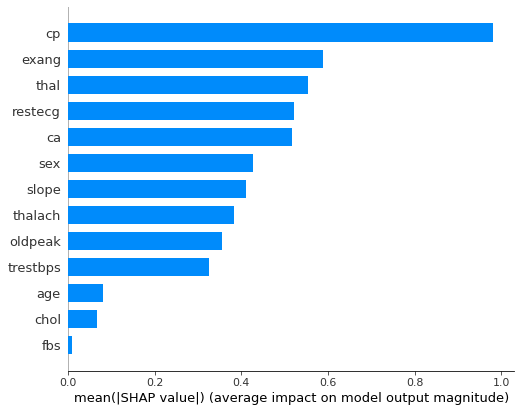

In [ ]:
shap.initjs()
shap.summary_plot(shap_values,plot_type='bar',features=X_test)

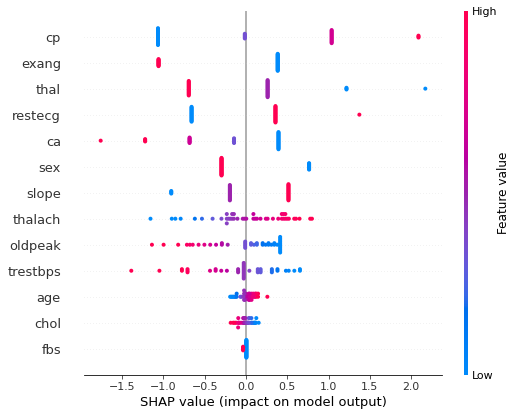

In [ ]:
shap.initjs()
shap.summary_plot(shap_values,features=X_test)

## Write your inferences from the generated plot.

From the two plots we could see that, cp,exang,thal,resrcg and ca are quite important in driving the model's decision with ca having 1.0 average impact on the modeland exang,thal,restecg,ca having around 0.6 average imapcts on the model'sprediction
Coming to the second plot we could see that cp affects the models predictions highest, also we could see that ca though has a lower overall effect on the model, when it comes to predicting is the value will be negative it has higher impacts on more rows. It can also be shown that thal has a higher effect of predictions on fewer samples since it has the largest shap values whereas cp, exang and cp have overall contributions on all predictions. take for instance cp  and  exang might be contributing 1,1, across all rows while thal might be contributing 0,0 and in some predictions contribute 50. From the example we can see that even though thal has more contributions in some predictions it is not like exang or cp which contribute to all the models predictions.

Also we see that age,chol and fbs dosen't really contribute to the model predictions ( which is quite true since heart diseases is not a respecter of age, both young and old people can be infected.

# Task 7

## Plot a dependence plot to show the effect of ‘chol’ across the whole dataset.

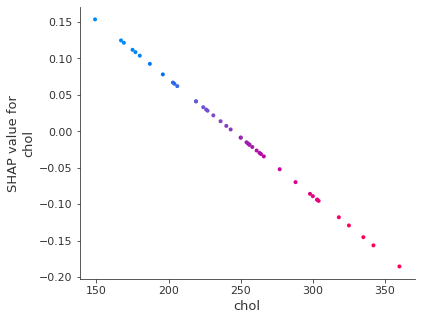

In [ ]:
shap.dependence_plot(ind='chol',shap_values=shap_values,interaction_index='chol',features=X_test_real)

## Write your inferences from the generated plot.

From here we could see that as chol(serum cholesterol in mg/dl) value aproaches positive infinity, the shap values approaches negative infirnity. We can see that when an indivudual has a chol of -2 then the shap valus will be around 0.15( which means that the prediction will be bumped up by 0.15 which might lead to prediction of heart disease). From here we can see that the higher the chol value the lower the shap values

# Task 8 (Optional)

## Do anything and everything with SHAP
This is the section to explore what more you can do with SHAP. Create some meaningful visualisations and write down what you can infer from them. 

Who knows, this section might carry some bonus points.

In [ ]:
#force plot for second row
shap.initjs()
shap.force_plot(explainer.expected_value,shap_values[1],features=X_test_real.iloc[1,:])

From the above we could see that thalach, trestbps and chol are very important when it comes to making prediction decision for this individual. We could aslo see that thalach is very influential in moving the prediction to the negative direction(no heart disease) with chol having small influence of moving the prediction to the negtive direction while trestbps have small influence of moving the prediction to the postiv direction ( have heart diseases). 

Since the sumation of the shap values for this individual(-1.28 in bold) is lower than the bases value which is 0.2584 the prediction is no heart diseases.

So we can say that the model predicted that this indivisual dosen't have heart diseases because this individual has 109 as thalach, 266 as chol and 124 as tresbps.

Dependency plot of thal to overall model prediction


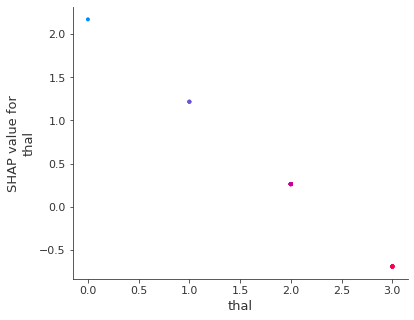

In [ ]:
shap.initjs()
shap.dependence_plot(ind='thal',interaction_index='thal',shap_values=shap_values,features=X_test_real)

Similar pattern can be observed in thal, the higher the thal value the lower the shap_values.

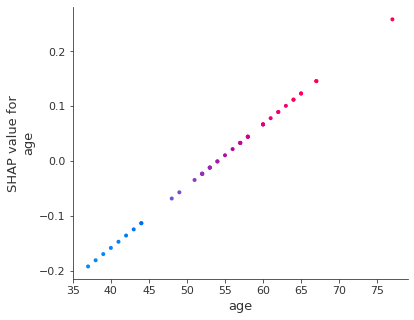

In [ ]:
shap.initjs()
shap.dependence_plot(ind='age',interaction_index='age',shap_values=shap_values,features=X_test_real)

Dependency plot of sex with the rest predictions

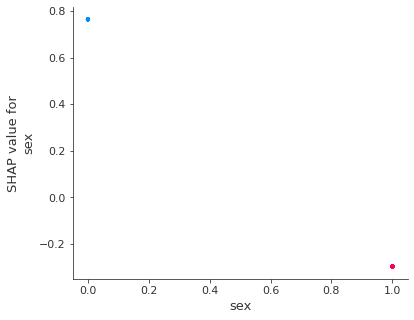

In [ ]:
shap.initjs()
shap.dependence_plot(ind='sex',shap_values=shap_values,interaction_index='sex',features=X_test_real)

From here we can see that females( indicated with 0) have positive shap values as compared to males (indicated with 1) which have negative shap values. It can also be deduced that 

Two way partial dependency plot

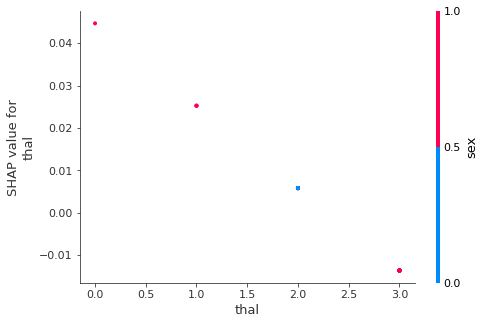

In [ ]:
#partial dependency plot of thal and sex
shap.initjs()
shap.dependence_plot(ind='thal',shap_values=shap_values,interaction_index='sex',features=X_test,display_features=X_test_real)

From here we can see that males(1) have higher chances of getting predicted as having heart diseases becuase their shap values increases with decrease in thal value while for female(0) their shap values with respect to thal is low. Also we can say that males with thal values of around 0.4 have higher chances of been predicted as having heart dieases since the shap values move towards positive region

That is the end of this assignment. We hope you learnt a lot along the way. 
Make sure you complete the other 2 parts (leaderboard submission and quiz) as well.

Now, rename this file as **firstname_lastname_XAI.ipynb**, Download it and submit it on the platform. 